### Apresentação

Este arquivo faz a classificação de malware para Android utilizando a *view* *Api calls*, sem seleção de características. O resultado final deste *notebook* mostra os resultados utilizados no artigo.

### Inicialização

Inicializa todas as bibliotecas utilizadas neste notebook.

In [31]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_curve, roc_auc_score)

### Preparação

y = vetor com as classes;
x = matriz com as características.

In [32]:
y = np.load(open("../../npy/apicalls-y-full-ordered.npy", "rb"))
x = np.load(open("../../npy/apicalls-x-pca-ordered.npy", "rb"))

In [33]:

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

### Treino e teste

Treina e testa os classificadores RF, DT, kNN;

In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [35]:
dt = DecisionTreeClassifier(min_samples_split=100, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=100, random_state=42)

In [36]:
knn = KNeighborsClassifier(n_neighbors=100, n_jobs=-1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=100)

### Métricas

#### RF

In [37]:
rf_y_test_predict_proba = rf.predict_proba(x_test)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_y_test_predict_proba[:,1], pos_label=1)
rf_auc = roc_auc_score(y_test, rf_y_test_predict_proba[:,1])



#### DT

In [38]:
dt_y_test_predict_proba = dt.predict_proba(x_test)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dt_y_test_predict_proba[:,1], pos_label=1)
dt_auc = roc_auc_score(y_test, dt_y_test_predict_proba[:,1])



#### kNN

In [39]:
knn_y_test_predict_proba = knn.predict_proba(x_test)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_y_test_predict_proba[:,1], pos_label=1)
knn_auc = roc_auc_score(y_test, knn_y_test_predict_proba[:,1])



### Resultado

Text(0, 0.5, 'True Positive Rate')

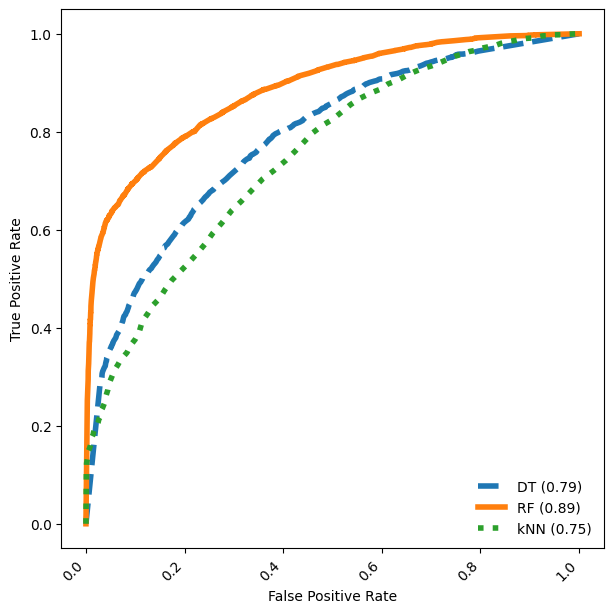

In [40]:
plt.figure(figsize=(7, 7))
plt.plot(dt_fpr, dt_tpr,label=f"DT ({round(dt_auc,2)})",linewidth=4, linestyle='dashed')
plt.plot(rf_fpr, rf_tpr,label=f"RF ({round(rf_auc,2)})",linewidth=4, linestyle='solid')
plt.plot(knn_fpr, knn_tpr,label=f"kNN ({round(knn_auc,2)})",linewidth=4, linestyle='dotted')
plt.legend(frameon=False, loc=4)
plt.xticks(rotation=45, ha='right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')